<a href="https://colab.research.google.com/github/loiswoo/Time-Series/blob/main/TS_study_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Anaylsis with Python(Beginner) at Kaggle

출처: https://www.kaggle.com/code/chirag19/time-series-analysis-with-python-beginner



In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams #rcParams: runtime configuration parameters
rcParams['figure.figsize'] = 15,6

In [3]:
data = pd.read_csv('/content/AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#Convert Month 'object' into 'datetime'
data['Month'] = pd.to_datetime(data.Month)

data = data.set_index(data.Month)
data.drop('Month', axis = 1, inplace = True)

In [7]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [9]:
ts['1949'] #1949년도인 데이터만 추출 

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

## 1. Check for Stationarity of Time Series

TS가 stationary하다는 것은 mean, variance가 시간이 변함에 따라 일정한 것

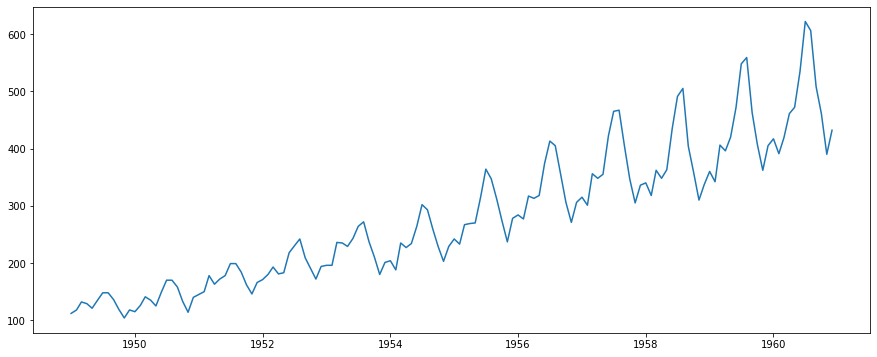

In [10]:
rcParams['figure.figsize']= 15,6
plt.plot(ts)

<AxesSubplot:ylabel='Density'>

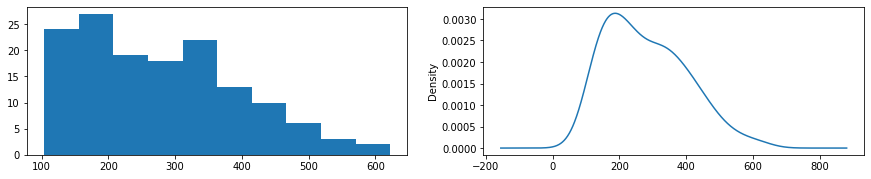

In [11]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')

**Stationary를 확인하는 방법**



Input: TS

1) Rolling Statistics(mean, std) plots를 그려서 확인

2) Dickey-Fuller Test으로 확인



In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries): 

  #determine rolling statistics
  rolmean = timeseries.rolling(window = 12).mean() #rolling 함수: 일정 범위에서 규칙적인 연산을 위한 함수(ex 이동평균) #window: 연산할 개수
  rolstd = timeseries.rolling(window = 12).std()

  #plot rolling statistics
  orig = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
  st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean. & Standard Deviation')
  plt.show()

  #Dickey_Fuller test: #단위근 검정을 위한 가장 대표적인 검정 방법 - 단위근을 가지면 비정상 과정
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries)
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['critical Value (%s)' %key] = value
  print(dfoutput)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


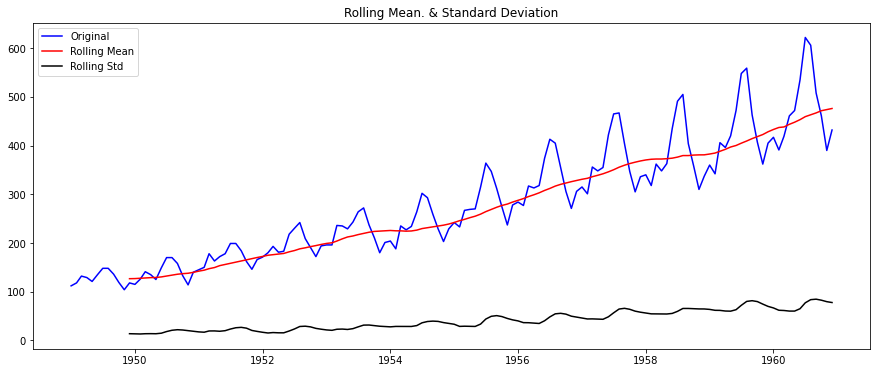

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
critical Value (1%)             -3.481682
critical Value (5%)             -2.884042
critical Value (10%)            -2.578770
dtype: float64


In [13]:
test_stationarity(ts)

`[TS] 결과 해석`

* std은 매우 적은 변동을 보이지만, mean은 
꾸준하게 증가한다. 
*  also, the test statistic is way more than the critical values(compare signed values and not the absolute values)

* 즉, 정상성을 만족하지 않는다

## 2. Make the Series Staionary

**TS가 Non-Stationary한 이유**
1. Trend - varying mean over time
2. Seasonality - variations at specific time-frames




**Non-Stationary 데이터 해결 방법**


Stationary Series가 되기 위해서 trend & seasonality를 제거한다. → Statistical forecasting techniques 적용하여 예측값을 도출한다.  → Forecasted values에 기존의 trend와 seasonality를 반영한다


###Estimating & Eliminating Trend

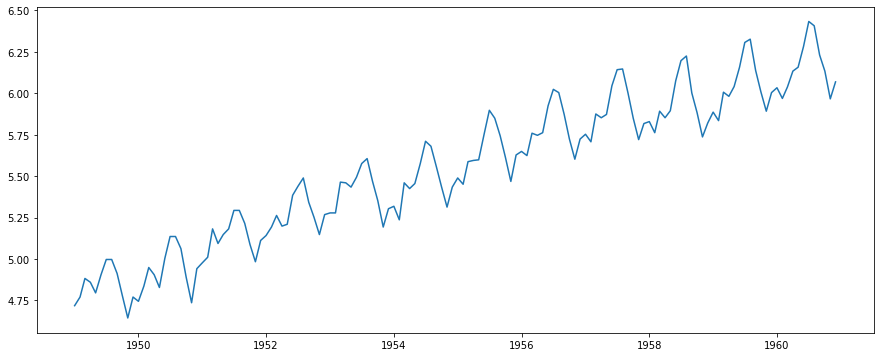

In [14]:
#ts에 log 취하기 → higher values를 penalize
ts_log = np.log(ts)
plt.plot(ts_log)

- 데이터의 트렌드를 파악하기 위한 방법들
1. Aggregation - taking average for a time period like montly / weekly averages
2. Smoothing - taking rolling averages
3. Polynomial Fitting - fit a regression model 

###Moving Average 
- 연속적인 k개의 값의 평균을 구함

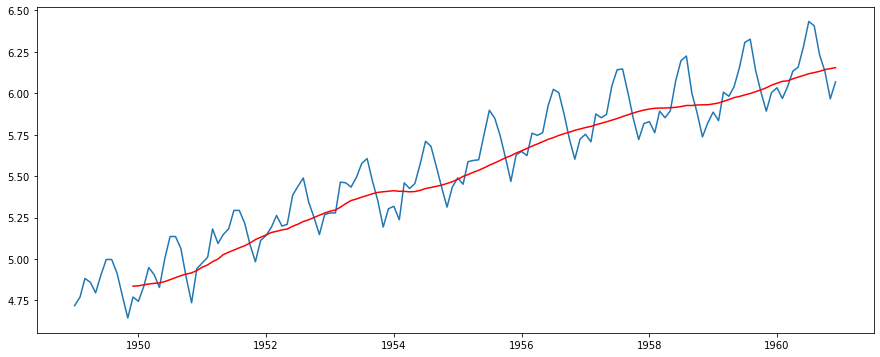

In [15]:
moving_avg = ts_log.rolling(12).mean()  #rolling 함수 사용
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

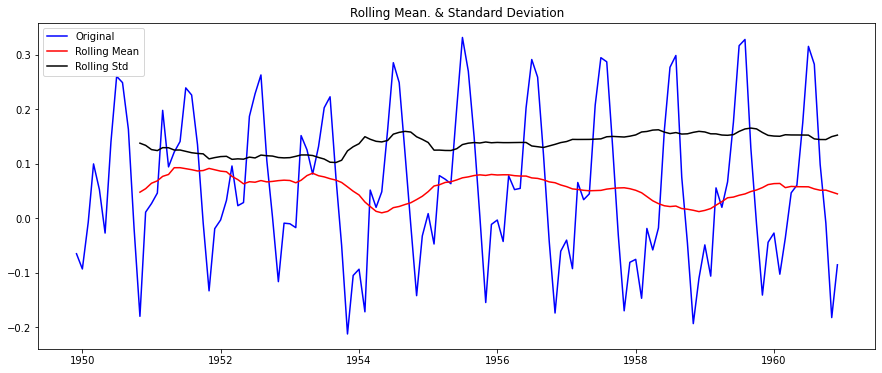

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
critical Value (1%)             -3.486535
critical Value (5%)             -2.886151
critical Value (10%)            -2.579896
dtype: float64


In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

`[TS_log - Moving_avg] 결과 해석`

*   rolling values(mean, std)의 변동이 거의 없고, 특별한 trend가 보이지 않는다
* test statistic가 5% critical value보다 작기 때문에 95% 유의수준으로 stationary series라고 얘기할 수 있다
* 즉, stationary series이다




---


그러나, moving average의 단점은 time-period has to be strictly defined 되어야 한다는 점이다. 

따라서 이것을 해결하기 위하여 'weighted moving average'를 이용한다. 

즉 최신 데이터에 더 큰 비중을 주는 것이다.


대표적인 방법이 *exponentially weighted moving average*

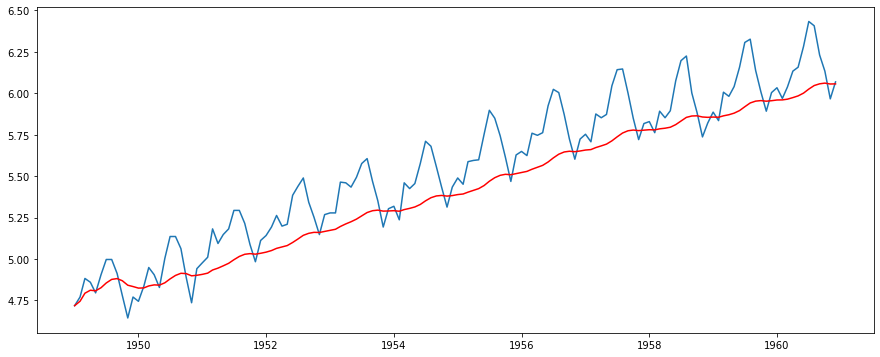

In [17]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean() #ewm: 지수가중함수(최근 데이터가 더 큰 영향) #halflife: 반감기를 이용하여 평활계수 계산
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

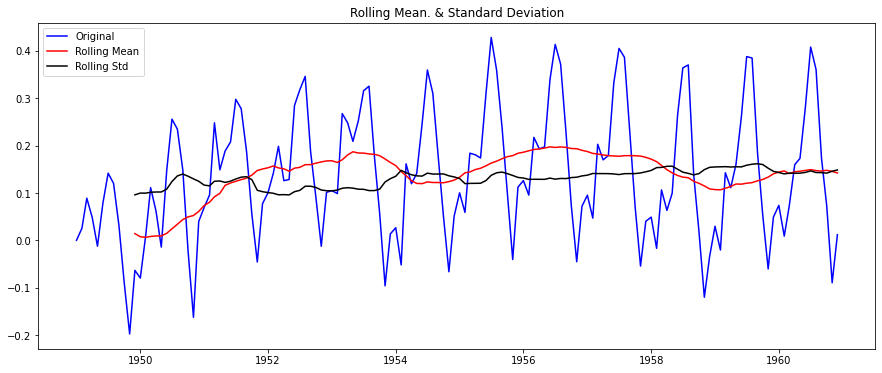

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
critical Value (1%)             -3.481682
critical Value (5%)             -2.884042
critical Value (10%)            -2.578770
dtype: float64


In [18]:
ts_log_ema_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ema_diff)

`[TS_log - Exp_Weighted_AVG] 결과 해석`

* 지수가중함수를 적용한 이후, mean, std의 변동성이 더 작아진 것을 확인할 수 있다
* Test Statistics 또한 1% 유의수준을 만족한다

## 3. Eliminating Trend and Seasonality

1) Differencing - 특정한 time lag 사이의 차이를 구한다 

2) Decomposition - trend와 seasonality를 모두 modeling하여 model로 부터 제거한다


###Differencing

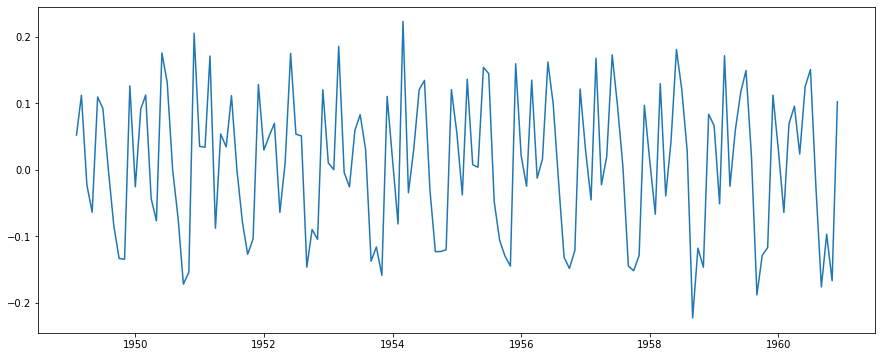

In [19]:
ts_log_diff = ts_log - ts_log.shift() #shift: 데이터나 인덱스를 원하는 기간 만큼 이동 #인수를 입력하지 않으면 데이터 자체가 이동
plt.plot(ts_log_diff)

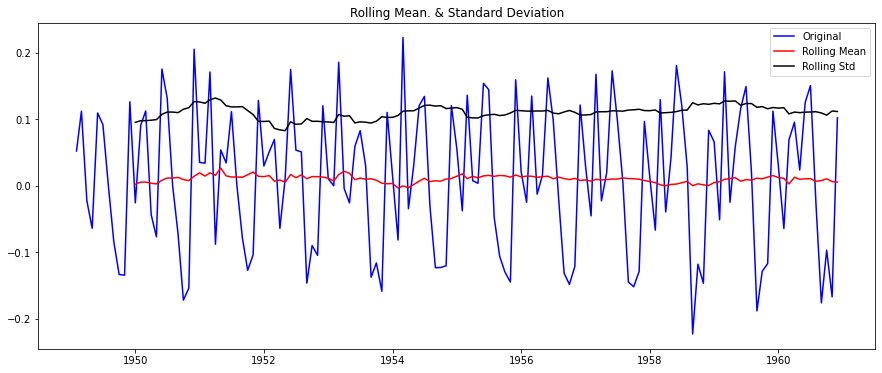

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
critical Value (1%)             -3.482501
critical Value (5%)             -2.884398
critical Value (10%)            -2.578960
dtype: float64


In [20]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

`[TS_log - TS_log.shift]결과 해석`



*   시간이 지남에 따라 평균과 분산의 변동성이 매우 작다
*   test statistic의 값이 10% critical value보다 낮기 때문에 'TS is stationary with 90% confidence'라고 할 수 있다
*   2차 차분, 3차 차분을 통해 더 좋은 결과를 얻을 것이라 예상 가능하다. 







###Decomposing

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend #연도별 크기의 윈도우를 움직여가며, 관측치들의 평균을 측정
seasonal = decomposition.seasonal #각 월별로 데이터를 모아 평균을 측정. 각 주기의 계절성은 트렌드에 대한 상대적인 증가 혹은 감소를 나타내므로 합이 0이 된다 
residual = decomposition.resid #원데이터 - trend - seasonal

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best') #자동으로 최적의 위치에 레전드를 위치시킨다
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

ImportError: ignored

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

`[TS_log_Decompose] 결과 해석`

* Test Statistic is significantly lower than the 1% critical value
* TS is very close to stationary

## 4. Forecasting a Time Series

In [ ]:
#ACF plot
pd.plotting.autocorrelation_plot(ts_log_diff)

Seasonality로 인하여 lag 12에서 AC가 매우 큰 것을 확인할 수 있으며, 12배수 lag마다 AC가 큰 것을 확인할 수 있다. 그러나 이 값 자체는 점차 낮아지고 있긴 하다.

In [ ]:
#ACF, PACF 그리기 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags =20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

In [ ]:
#ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96 /np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function') 
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding




---



In [ ]:
!pip install statsmodels==0.12.2

In [ ]:
#load ARIMA model
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#import statsmodels.api as sm

###**AR Model**

In [ ]:
model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2)) #Residual sum of squares

In [ ]:
#model = sm.tsa.arima.ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2)) #RSS

### **MA Model**

In [ ]:
model = ARIMA(ts_log, order = (0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fitedvalues, color = 'red')
plt.title('RSS: &.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

### **Combined Model**

In [ ]:
model = ARIMA(ts_log, order = (2,1,2,))
results_ARIMNA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.tilte('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

Original Scale

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA-log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RSME: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))



---



---



SARIMAX